<font size = "20"> Spotify Music Analysis </font>

In this project, we will attempt to analyze Spotify playlists to see how compatible two user's playlists are. We will also use content-based filtering to create a recommendation system. 

In [1]:
# All imports are listed here
import requests
import spotipy.util as util
import spotipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
from json.decoder import JSONDecodeError

The first step in the process is to authenticate with the Spotify API and then import both of our playlists. The songs of both playlists are printed below

In [2]:
# Authentication with Spotify API
sp = spotipy.Spotify()
cid ="9eab3f44cb5f42bd9d144ff2e2ad767f"
secret = "677567e07a1c4d9980adc0da6868b316"
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
sp.trace=False # What is this?

# This is Shubham's playlist
playlist = sp.user_playlist("1232443238", "5XpKz5MtjD6Vxh8mN3fhK7")
songs = playlist["tracks"]["items"]
ids = []

# This is Jorge's playlist
playlist2 = sp.user_playlist('jorgevicencio87', '1lbwjOlw40jDMvgmpbUlxL')
songs2 = playlist2["tracks"]["items"]
ids2 = []



In [3]:
# Printing out playlist name and total tracks
print('Playlist Name:', playlist['name'], '(Shubhams Playlist)')
print('Total Tracks:', playlist['tracks']['total'])

# Obtain tracks from Shubham's playlist
results = sp.user_playlist("1232443238", playlist['id'], fields="tracks,next")
tracks = results['tracks']

# Print out all tracks from Shubham's playlist using a counter
counter = 1
for i in results['tracks']['items']:
    print(counter, i['track']['artists'][0]['name'] + ' - ' + i['track']['name'])
    counter = counter + 1
print('')
# Print out Jorge's playlist name and total tracks   
print('Playlist Name:', playlist2['name'], '(Jorges Playlist)')
print('Total Tracks:', playlist2['tracks']['total'])


# Obtain tracks from Jorge's playlist
results2 = sp.user_playlist("jorgevicencio87", playlist2['id'], fields="tracks,next")
tracks = results2['tracks']

# Print out all tracks from Jorge's playlist using a counter
counter = 1
for i in results2['tracks']['items']:
    print(counter, i['track']['artists'][0]['name'] + ' - ' + i['track']['name'])
    counter = counter + 1




Playlist Name: Epic Songs (Shubhams Playlist)
Total Tracks: 45
1 Jimi Hendrix - All Along the Watchtower
2 The Rolling Stones - Gimme Shelter
3 Ten Years After - I'd Love To Change The World
4 Nena - 99 Luftballons
5 Ray Charles - Hit the Road Jack
6 The Mamas & The Papas - California Dreamin'
7 The Cars - Just What I Needed
8 Neil Young - Heart of Gold - 2009 Remaster
9 Kyu Sakamoto - Sukiyaki
10 Bob Dylan - Don't Think Twice, It's All Right
11 The Beatles - While My Guitar Gently Weeps - Remastered 2009
12 Massive Attack - Paradise Circus
13 Fleetwood Mac - The Chain - 2004 Remaster
14 Guns N' Roses - Sweet Child O' Mine
15 Men At Work - Down Under
16 New Order - Bizarre Love Triangle
17 The Cranberries - Zombie
18 Brigitte Bardot - Bonnie And Clyde
19 Johnny Cash - Hurt
20 Led Zeppelin - Stairway to Heaven - Remaster
21 Mary Hopkin - Those Were The Days - Remastered
22 Lynyrd Skynyrd - Free Bird
23 Derek & The Dominos - Layla
24 Mazzy Star - Fade Into You
25 Gorillaz - Feel Good Inc

For the next step, we want to find out what the feature values are for each song in every playlist. Before the values are manipluated, for both playlists we will first normalize all of the numerical values and then find the average value for the entire playlist

In [4]:
# Prints out all feature values in Shubham's Playlist
for i in range(len(songs)):
    ids.append(songs[i]["track"]["id"])
features = sp.audio_features(ids)

# Print out all feature Playlists in Jorge's Playlist
for i in range(len(songs2)):
    ids2.append(songs2[i]["track"]["id"])
features2 = sp.audio_features(ids2)

# Converting to dataframe and print
df = pd.DataFrame(features)
df2 = pd.DataFrame(features2)

In [5]:
# Normalizing step for the 13 numeric columns? (Shubham's playlist)
norm = df.copy()
music1mean = []
for col in df:
    if (df[col].dtype != 'object'):
        norm[col] = norm[col] /norm[col].abs().max()
        music1mean.append([norm[col].mean(),col])
        

# Normalizing step for Jorge's Playlist 
norm = df2.copy()
music2mean = []
for col in df2:
    if (df[col].dtype != 'object'):
        norm[col] = norm[col] /norm[col].abs().max()
        music2mean.append([norm[col].mean(),col])
music1mean

[[0.6447161097527845, 'danceability'],
 [0.6563350785340313, 'energy'],
 [0.5010101010101009, 'key'],
 [-0.4888329593860761, 'loudness'],
 [0.5111111111111111, 'mode'],
 [0.22649291266575225, 'speechiness'],
 [0.3173055555555556, 'acousticness'],
 [0.1275048436068577, 'instrumentalness'],
 [0.2705600870038064, 'liveness'],
 [0.5325726141078838, 'valence'],
 [0.6840859832564179, 'tempo'],
 [0.4553031775421547, 'duration_ms'],
 [0.9833333333333333, 'time_signature']]

In [6]:
music2mean

[[0.7757596685082874, 'danceability'],
 [0.6808324812542604, 'energy'],
 [0.5094696969696969, 'key'],
 [-0.47146856982499097, 'loudness'],
 [0.5833333333333334, 'mode'],
 [0.35645900755124055, 'speechiness'],
 [0.24331286195844382, 'acousticness'],
 [0.03495854166666668, 'instrumentalness'],
 [0.21985837438423647, 'liveness'],
 [0.5607892763404575, 'valence'],
 [0.7141046960931957, 'tempo'],
 [0.546898830757996, 'duration_ms'],
 [1.0, 'time_signature']]

Here, we will find the difference between each of the feature values and then graph it

Text(0.5, 0, 'Feature')

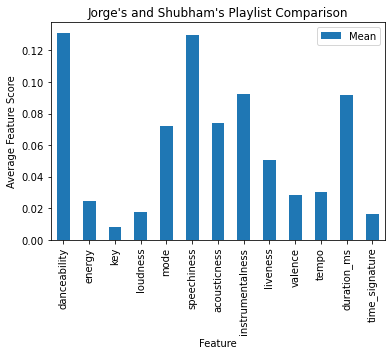

In [7]:
# First, need to convert lists to dataframe
columns = []
pl_data1 = []
pl_data2 = []
for tup in music1mean:
    pl_data1.append(tup[0])
    columns.append(tup[1])
for tup in music2mean:
    pl_data2.append(tup[0])
    
    
df3 = pd.DataFrame(pl_data1, columns=['Mean'])
df4 = pd.DataFrame(pl_data2, columns=['Mean'])
df5 = df4-df3
df5 = df5.abs()
# Next, ned to graph
chart = df5.plot.bar()
chart.set_xticklabels(columns)
chart.set_title('Jorge\'s and Shubham\'s Playlist Comparison')
chart.set_ylabel('Average Feature Score')
chart.set_xlabel('Feature')

In the chart above the closer a value is to zero the more similar they are. As can be seen here our music taste from the sample playlist is quite differnt. However, if we examine the chart further we can see that we like music in a similar key, and we also like music with a similar length, liveness, and tempo. Every other column seems to have a big difference.

Jorge has 30 different artists in his playlist of 48 songs.
Whereas Shubham has 44 different artists in his playlist of 45 songs.


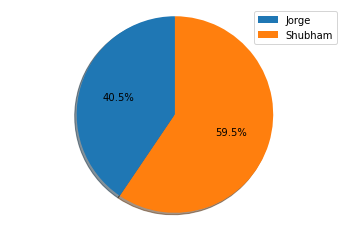

In [8]:
# TODO: Make artist graphic
jorge_dict = {}
for song in results2['tracks']['items']:
    if song['track']['artists'][0]['name'] not in jorge_dict:
        jorge_dict[song['track']['artists'][0]['name']] = 1
    else: 
        jorge_dict[song['track']['artists'][0]['name']] += 1

shub_dict = {}
for song in results['tracks']['items']:
    if song['track']['artists'][0]['name'] not in shub_dict:
        shub_dict[song['track']['artists'][0]['name']] = 1
    else: 
        shub_dict[song['track']['artists'][0]['name']] += 1
        
print('Jorge has', len(jorge_dict), 'different artists in his playlist of', playlist2['tracks']['total'], 'songs.')
print('Whereas Shubham has', len(shub_dict), 'different artists in his playlist of', playlist['tracks']['total'], 'songs.')
labels = 'Jorge', 'Shubham'
sizes = [len(jorge_dict), len(shub_dict)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.legend(labels = labels) 

plt.show()

As can be seen in the pie chart above Shubham has more variety in artists in his playlist. He has a single repeated artist where as Jorge has multiple songs by the same artist. They both have a variety, but Shubhams variety is greater than Jorges.

In [9]:
popularity_shubham = []
for song in results['tracks']['items']:
    popularity_shubham.append(song['track']['popularity'])
    
popularity_jorge = []
for song in results2['tracks']['items']:
    popularity_jorge.append(song['track']['popularity'])
    
print('Average popularity for Shubham\'s playlist:', round(sum(popularity_shubham)/len(popularity_shubham), 2))
print('Average popularity for Jorge\'s playlist:', round(sum(popularity_jorge)/len(popularity_jorge), 2))

Average popularity for Shubham's playlist: 53.42
Average popularity for Jorge's playlist: 62.5


In [10]:
names = ['Jorge', 'Shubham']
scores = [round(sum(popularity_jorge)/len(popularity_jorge), 2), round(sum(popularity_shubham)/len(popularity_shubham), 2)]

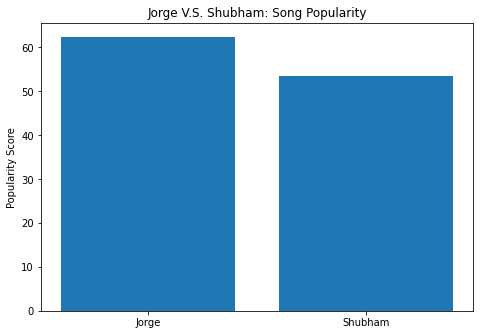

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(names,scores)
ax.set_ylabel('Popularity Score')
ax.set_title('Jorge V.S. Shubham: Song Popularity')
plt.show()

As can be seen from the graphic above Jorge appears to have the more popular songs on his playlist. Jorge's popularity scores avereaged to just over 60 and Shubham's popularity scores averaged just over 50.

Using the information we have gathered we will now develop a list of reccomendations for each playlist. Each set of recommendations will be unique to a playlist and will group five songs and artists together until there are none left in order to generate the best recommendations for that particular playlist. 

In [12]:
artists = []
print('Recommendations for Jorge: ')
for song in results2['tracks']['items']:
    if len(artists) < 5:
        artists.append(song['track']['artists'][0]['id'])
    else:
        rec = sp.recommendations(artists, limit=5)
        for title in rec['tracks']:
            print(title['name'], '-', title['artists'][0]['name'])
        artists.clear()
        
print('\n')

artists = []
print('Recommendations for Shubham: ')
for song in results['tracks']['items']:
    if len(artists) < 5:
        artists.append(song['track']['artists'][0]['id'])
    else:
        rec = sp.recommendations(artists, limit=5)
        for title in rec['tracks']:
            print(title['name'], '-', title['artists'][0]['name'])
        artists.clear()

Recommendations for Jorge: 
Japanese Denim - Daniel Caesar
Mi tesoro (feat. Nicky Jam) - Zion & Lennox
Infinitamente - Nio Garcia
105 F Remix - KEVVO
Fuck The World (Summer in London) - Brent Faiyaz
25/8 - Bad Bunny
Bitch, Don’t Kill My Vibe - Kendrick Lamar
Slow Motion - Trey Songz
Welcome Back - Bruno Mars
Cheating on You - Charlie Puth
Algo Mágico - Rauw Alejandro
Do You Want To - Franz Ferdinand
La Difícil - Bad Bunny
Prrrum - Cosculluela
Vampire - Feat. Whiteboy John - Tribal Seeds
Jane Says - Jane's Addiction
Drama (feat. Drake) - Roy Woods
Low Low - Mustard
3G (feat. Jon Z, Don Chezina, Chencho Corleone & Myke Towers) - Remix - Wisin
No Se De Ella "My Space" - Don Omar
Necesario - Miky Woodz
Brillo - J Balvin
Life's A Mess (feat. Halsey) - Juice WRLD
NOT SOBER (feat. Polo G & Stunna Gambino) - The Kid LAROI
Yonaguni - Bad Bunny
Criminal - Natti Natasha
Problems - Don Diablo
You Spin Me Round (Like A Record) - Dope
Síguelo Bailando - Ozuna
Out Of Control - Hoobastank
BIG BANK (fe

In [13]:
jorge_dates = []
for song_date in results2['tracks']['items']:
    jorge_dates.append(int(song_date['track']['album']['release_date'][0:4]))
    
shubham_dates = []
for song_date1 in results['tracks']['items']:
    shubham_dates.append(int(song_date1['track']['album']['release_date'][0:4]))

In [94]:
print("Average song age for Jorge\'s playlist:", 2021 - np.mean(jorge_dates))
print("Average song age for Shubham\'s playlist:", 2021 - np.mean(shubham_dates))

Average song age for Jorge's playlist: 4.3125
Average song age for Shubham's playlist: 27.40000000000009


As can be seen from the analysis above the average song age of Shubham's playlist is much greater than than that of Jorge's playlist. This means that Shubham has songs that are much older than that of Jorge's playlist. The average release date of Jorge's playlist is 2016 and the average release date is Shubham's playlist is 1993.

## Machine Learning Model (KNN)

In order to build a K-Nearest Neighbors model we must begin by adding labels to each playlist. In our case Jorge will be labeled '0' and Shubham will be labeled '1'.

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [16]:
shubham_class = []
for i in range(len(df)) :
    shubham_class.append(1)
    
jorge_class = []
for i in range(len(df2)) :
    jorge_class.append(0)
    
df['class'] = shubham_class
df2['class'] = jorge_class

Once the labels have been added to each playlist dataframe we must now concatenate the two data frames.

In [39]:
frames = [df,df2]
df3 = pd.concat(frames)
df3

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,class
0,0.438,0.805,8,-6.237,1,0.0624,0.00255,0.000057,0.0842,0.564,113.253,audio_features,2aoo2jlRnM3A0NyLQqMN2f,spotify:track:2aoo2jlRnM3A0NyLQqMN2f,https://api.spotify.com/v1/tracks/2aoo2jlRnM3A...,https://api.spotify.com/v1/audio-analysis/2aoo...,240800,4,1
1,0.634,0.630,1,-8.277,0,0.0310,0.44700,0.039000,0.1700,0.489,118.628,audio_features,6H3kDe7CGoWYBabAeVWGiD,spotify:track:6H3kDe7CGoWYBabAeVWGiD,https://api.spotify.com/v1/tracks/6H3kDe7CGoWY...,https://api.spotify.com/v1/audio-analysis/6H3k...,270773,4,1
2,0.382,0.497,4,-11.815,0,0.0328,0.11700,0.233000,0.1100,0.391,117.446,audio_features,4D3Twi99sdqxesC68XAPf5,spotify:track:4D3Twi99sdqxesC68XAPf5,https://api.spotify.com/v1/tracks/4D3Twi99sdqx...,https://api.spotify.com/v1/audio-analysis/4D3T...,224027,4,1
3,0.575,0.555,4,-7.495,1,0.0453,0.10300,0.000001,0.1110,0.504,95.361,audio_features,4ZhPLoMzZwewHLLjV1J15c,spotify:track:4ZhPLoMzZwewHLLjV1J15c,https://api.spotify.com/v1/tracks/4ZhPLoMzZwew...,https://api.spotify.com/v1/audio-analysis/4ZhP...,232467,4,1
4,0.599,0.704,8,-8.566,0,0.2430,0.71400,0.000000,0.5210,0.950,173.043,audio_features,3Q7LXyGZ3SLD0dLztx3j5x,spotify:track:3Q7LXyGZ3SLD0dLztx3j5x,https://api.spotify.com/v1/tracks/3Q7LXyGZ3SLD...,https://api.spotify.com/v1/audio-analysis/3Q7L...,120173,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,0.657,0.893,7,-2.416,1,0.0739,0.06250,0.000000,0.0688,0.514,127.992,audio_features,1ueQDgg9WsjXF8NwJeLvUE,spotify:track:1ueQDgg9WsjXF8NwJeLvUE,https://api.spotify.com/v1/tracks/1ueQDgg9WsjX...,https://api.spotify.com/v1/audio-analysis/1ueQ...,198227,4,0
44,0.792,0.717,0,-4.759,0,0.0393,0.09270,0.000036,0.2260,0.466,121.985,audio_features,1A8j067qyiNwQnZT0bzUpZ,spotify:track:1A8j067qyiNwQnZT0bzUpZ,https://api.spotify.com/v1/tracks/1A8j067qyiNw...,https://api.spotify.com/v1/audio-analysis/1A8j...,195547,4,0
45,0.843,0.435,8,-8.442,1,0.1780,0.47000,0.000000,0.1470,0.190,120.058,audio_features,6GnhWMhgJb7uyiiPEiEkDA,spotify:track:6GnhWMhgJb7uyiiPEiEkDA,https://api.spotify.com/v1/tracks/6GnhWMhgJb7u...,https://api.spotify.com/v1/audio-analysis/6Gnh...,208080,4,0
46,0.884,0.653,11,-7.653,0,0.0586,0.37100,0.001350,0.8120,0.766,108.548,audio_features,2IFFKj9orAsQOOS0JRhHAW,spotify:track:2IFFKj9orAsQOOS0JRhHAW,https://api.spotify.com/v1/tracks/2IFFKj9orAsQ...,https://api.spotify.com/v1/audio-analysis/2IFF...,174213,4,0


Using the bar chart titled "Jorge's and Shubham's Playlist Comparison" above we can see that the two columns with the highest difference are "Danceability" and "Speechiness" so we will use those columns to train our model.

Text(0, 0.5, 'Speechiness')

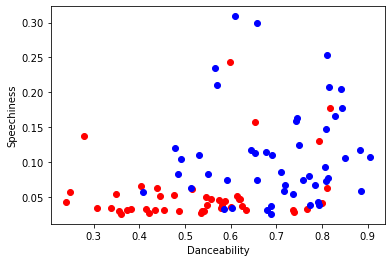

In [25]:
plt.scatter( df.danceability, df.speechiness, color='red',
            alpha=1
)
plt.scatter( df2.danceability, df2.speechiness, color='blue',
            alpha=1
)
plt.xlabel('Danceability')
plt.ylabel('Speechiness')

Using the features "danceability" and "Speechiness" we are able to see with the scatter plot that Shubham's music (red label) is grouped up on the bottom left for the most part and Jorge's music (blue label) is grouped on the upper right. It is not hard to see the clear separation in the two differnt playlists. From here we can build a K-Nearest Neighbors model to predict whether a song will fall under Jorge's or Shubham's playlist.

We will begin by splitting the data into a training and testing data sets.

In [85]:
x_train, x_test, y_train, y_test = train_test_split(
    df3[['danceability','speechiness']], df3['class'], test_size=0.33, random_state=42)

Once our data has been split we can train our model and fit it to our data. Once the model is trained we can pass in our testing data and see if our predictions are correct.

We decided that we wanted to test multiple values for K so we trained the model in a loop with varrying values for K. Each iteration tests a different number of neighbors  and records the accuracy to see if the number of neighbors affects the accuracy.

In [86]:
k_vals = [1,2,3,4,5,6,7,8,9,10]
acc = []
for k in k_vals:
    pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))
    pipeline.fit(x_train,y_train)
    pred_labels = pipeline.predict(x_test)
    accuracy = sum(y_test == pred_labels)/len(y_test)
    acc.append(accuracy)

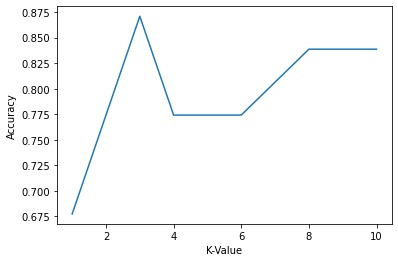

In [87]:
mean_list = []
std_list = []
for row in acc:
    row = np.array(row)
    mean_list.append(row.mean())
    std_list.append(row.std())
plt.errorbar(k_vals, mean_list, std_list)
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.show()

As can be seen from the chart above the highest accuracy we managed to achieve was about 87% and we were averaging an accuracy of about 80%. The lowest accuracy we achieved was about 67% which shows just how sensitive the 1-Nearest Neighbors model is to outliers. Perhaps we could increase accuracy by testing different features, but a better way would be to use a bigger dataset. 